In [ ]:
!pip install pycaret --progress-bar off
!pip install dabl --progress-bar off
!pip install shap --progress-bar off
!pip install sdv
!pip install sdv[ctgan]

In [92]:
from pycaret.classification import * # Preprocessing, modelling, interpretation, deployment...
import pandas as pd # Basic data manipulation
import dabl as db # Summary plot
from sdv.tabular import CTGAN # Synthetic data
from sdv.tabular import GaussianCopula

In [2]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [3]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [115]:
#def gen_synth_data(epochs: int, embedding_dim: int, )

# Create CTGAN model for synthetic data
model = GaussianCopula(primary_key = "EmployeeNumber",
                       field_distributions = {"DistanceFromHome" : "parametric_bounded",
 "HourlyRate": "parametric_bounded",  
 "DailyRate": "parametric_bounded",
 "MonthlyIncome": "parametric_bounded",
 "MonthlyRate": "parametric_bounded",
 "NumCompaniesWorked": "parametric_bounded", 
 "PercentSalaryHike": "parametric_bounded",
 "TotalWorkingYears": "parametric_bounded", 
 "YearsAtCompany": "parametric_bounded",
 "YearsWithCurrManager": "parametric_bounded", 
 "TrainingTimesLastYear": "parametric_bounded", 
 "YearsSinceLastPromotion": "parametric_bounded",
 "StockOptionLevel" : "parametric_bounded",
 "EnvironmentSatisfaction" : "parametric_bounded",
 "JobInvolvement" : "parametric_bounded",
 "JobSatisfaction" : "parametric_bounded",
 "Education" : "parametric_bounded",
 "PerformanceRating" : "parametric_bounded",
 "RelationshipSatisfaction" : "parametric_bounded",
 "WorkLifeBalance" : "parametric_bounded",
 "BusinessTravel": "parametric_bounded",
 "Department" : "parametric_bounded", 
 "EducationField" : "parametric_bounded",
  "JobRole" : "parametric_bounded",
  "Gender" : "parametric_bounded",
   "JobLevel" : "parametric_bounded", 
   "JobRole" : "parametric_bounded", 
   "Over18" : "parametric_bounded",
   "MaritalStatus" : "parametric_bounded", 
   "OverTime" : "parametric_bounded", 
   "WorkLifeBalance" : "parametric_bounded"})

# Fit model
model.fit(hr_data)

# Generate synthetic data
synth_data = model.sample(200, max_retries = 250)

evaluate(synth_data, hr_data)

0.7625597411322252

Target looks like classification
Linear Discriminant Analysis training set score: 0.503


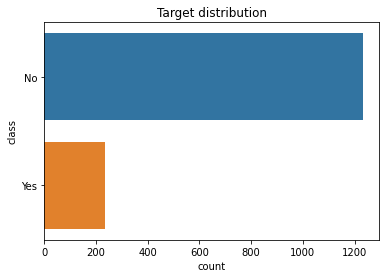

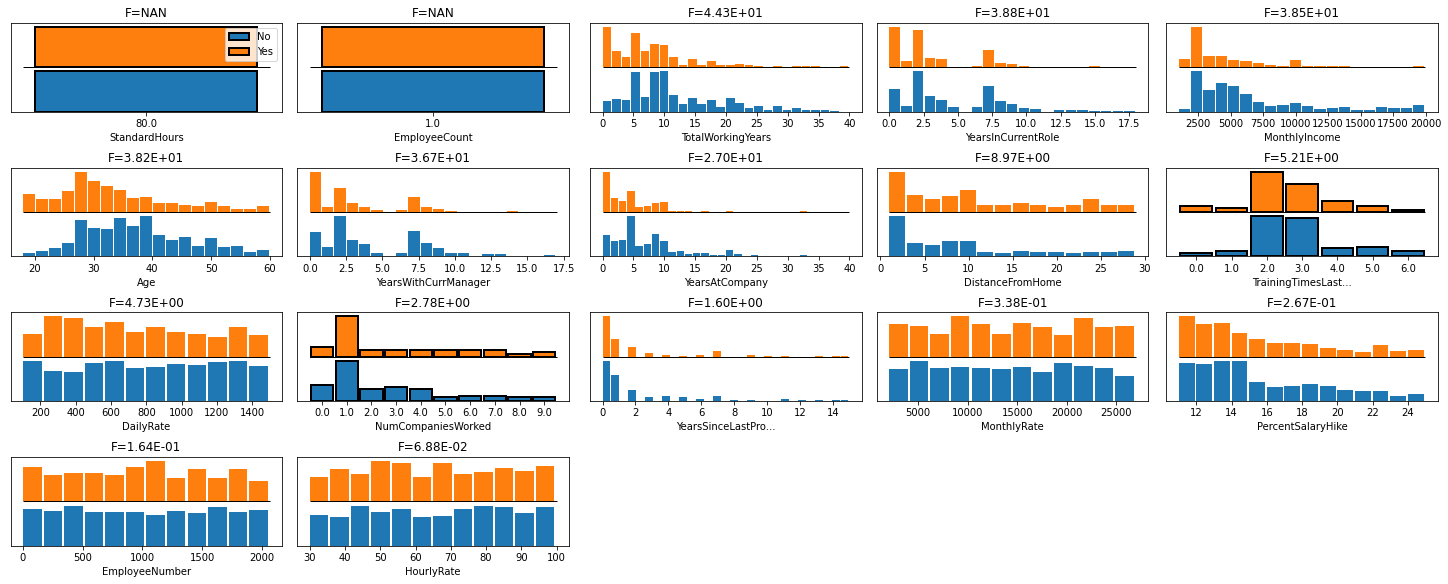

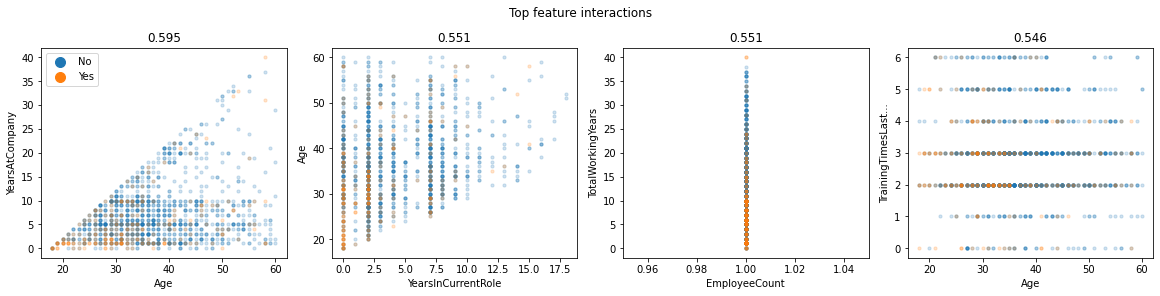

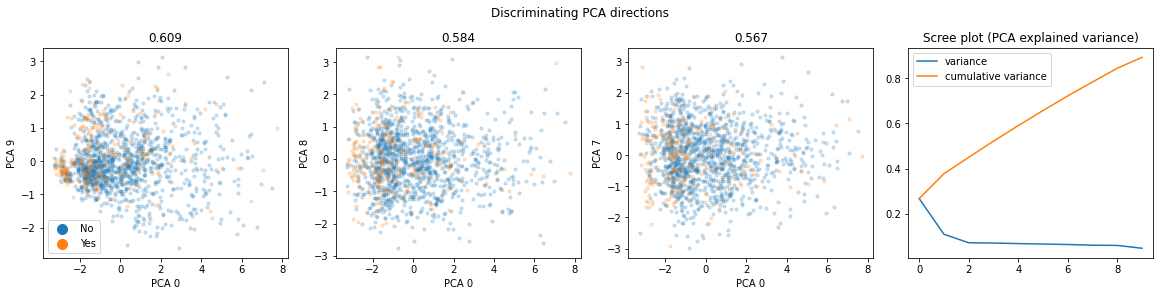

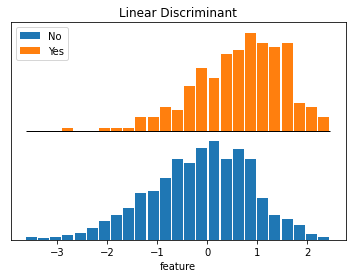

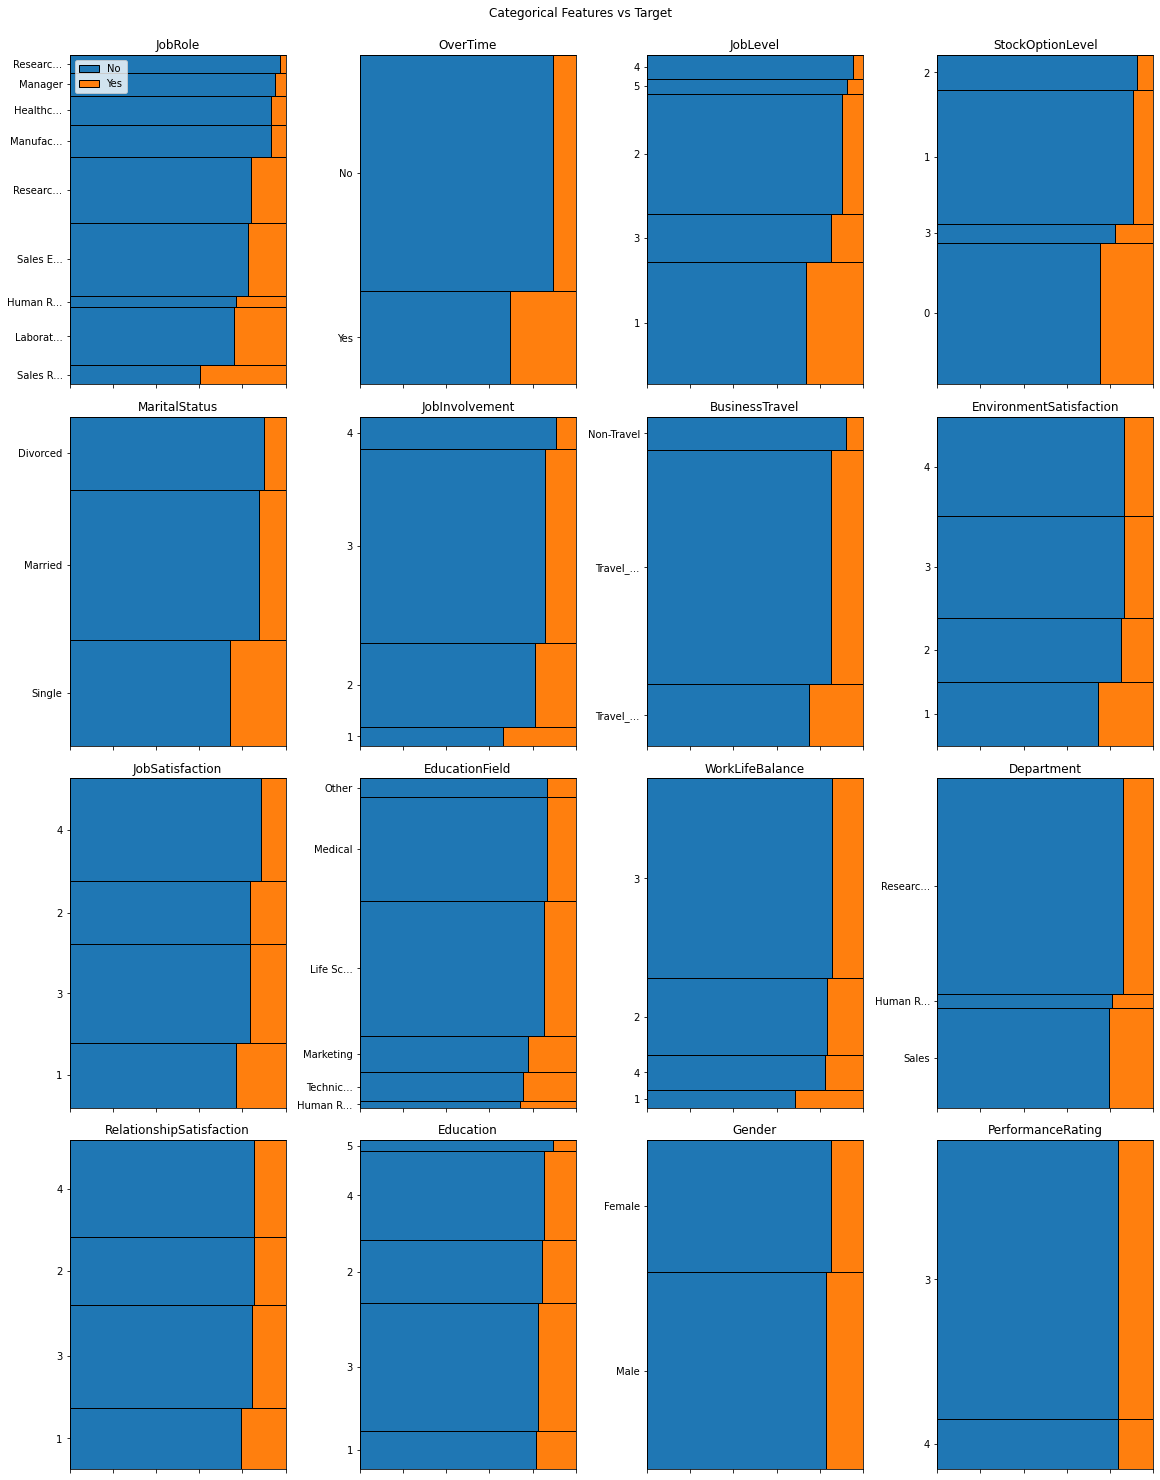

In [4]:
# Plot summaries of continuous + categorical features
## Type hints are used to force types on certain features
db.plot(hr_data, y = "Attrition", 
        type_hints = {"DistanceFromHome" : "continuous",
                      "EmployeeCount" : "continuous",
                      "HourlyRate" : "continuous",
                      "MonthlyRate" : "continuous", 
                      "NumCompaniesWorked" : "continuous", 
                      "PercentSalaryHike" : "continuous",
                      "StandardHours" : "continuous", 
                      "TotalWorkingYears" : "continuous", 
                      "YearsAtCompany" : "continuous",
                      "YearsSinceLastPromotion" : "continuous",
                      "YearsWithCurrManager" : "continuous", 
                      "TrainingTimesLastYear" : "continuous",
                      "Age" : "continuous",
                      "DailyRate" : "continuous",
                      "MonthlyIncome" : "continuous"})

In [116]:
target = "Attrition"

cont_feats = ["DistanceFromHome", "HourlyRate",  "DailyRate", "MonthlyIncome",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "TotalWorkingYears", "YearsAtCompany",
              "YearsWithCurrManager", "TrainingTimesLastYear", "YearsSinceLastPromotion"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3"],
             "EnvironmentSatisfaction" : ["1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["1", "2", "3", "4"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4"],
             "RelationshipSatisfaction" : ["1", "2", "3", "4"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber", "StandardHours", "EmployeeCount"]

In [162]:
hr_data["dataset"] = "real"
synth_data["dataset"] = "synth"

full_data = pd.concat([hr_data, synth_data])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hr_data.drop("Attrition", axis = 1), hr_data["Attrition"], test_size=0.33, random_state=42)

X_train["Attrition"] = y_train
X_test["Attrition"] = y_test

input = pd.concat([X_train, synth_data]).drop("dataset", axis = 1)
test = X_test.drop("dataset", axis = 1)

In [ ]:
setup(input, target = target, 
      train_size = 0.75,
      transformation = True, pca = True,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      ignore_features = ignore,
      normalize = True,
      normalize_method = "minmax",
      data_split_stratify = True,
      silent = True)

In [128]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8885,0.8515,0.4460,0.6814,0.5305,0.4707,0.4887,0.023
lr,Logistic Regression,0.8961,0.8508,0.4404,0.7200,0.5420,0.4879,0.5088,0.028
catboost,CatBoost Classifier,0.8699,0.8326,0.1312,0.6383,0.2118,0.1812,0.2531,11.320
et,Extra Trees Classifier,0.8666,0.8293,0.0592,0.6000,0.1061,0.0937,0.1718,0.505
rf,Random Forest Classifier,0.8691,0.8115,0.0838,0.6667,0.1467,0.1290,0.2142,0.757
gbc,Gradient Boosting Classifier,0.8759,0.8078,0.2147,0.7035,0.3215,0.2767,0.3378,1.082
xgboost,Extreme Gradient Boosting,0.8784,0.8037,0.2562,0.7407,0.3753,0.3243,0.3839,0.508
lightgbm,Light Gradient Boosting Machine,0.8776,0.8024,0.2324,0.7339,0.3464,0.2989,0.3624,0.393
nb,Naive Bayes,0.8167,0.7996,0.6195,0.4634,0.5123,0.4097,0.4251,0.018
ada,Ada Boost Classifier,0.8615,0.7830,0.3342,0.5374,0.4063,0.3332,0.3480,0.299


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [141]:
lda = create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8989,0.8690,0.4167,0.7143,0.5263,0.4741,0.4957
1,0.8876,0.8182,0.4167,0.6250,0.5000,0.4395,0.4510
2,0.8876,0.7733,0.4615,0.6667,0.5455,0.4838,0.4944
3,0.8539,0.8583,0.3846,0.5000,0.4348,0.3525,0.3565
4,0.9101,0.9190,0.6154,0.7273,0.6667,0.6151,0.6180
5,0.9101,0.9089,0.5385,0.7778,0.6364,0.5870,0.5999
6,0.8652,0.8745,0.4615,0.5455,0.5000,0.4227,0.4247
7,0.9213,0.9150,0.6154,0.8000,0.6957,0.6514,0.6588
8,0.9318,0.9287,0.6667,0.8000,0.7273,0.6887,0.6924
9,0.8636,0.7390,0.4167,0.5000,0.4545,0.3774,0.3794


In [184]:
tune_model(lda, n_iter = 50, optimize = "Accuracy")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9101,0.8442,0.4167,0.8333,0.5556,0.5117,0.5499
1,0.8989,0.8095,0.3333,0.8000,0.4706,0.4250,0.4752
2,0.8876,0.7409,0.3077,0.8000,0.4444,0.3954,0.4517
3,0.8876,0.8239,0.2308,1.0000,0.3750,0.3388,0.4516
4,0.9326,0.8431,0.5385,1.0000,0.7000,0.6658,0.7064
5,0.9213,0.9109,0.4615,1.0000,0.6316,0.5941,0.6501
6,0.8989,0.9059,0.5385,0.7000,0.6087,0.5518,0.5580
7,0.8989,0.9302,0.3077,1.0000,0.4706,0.4315,0.5245
8,0.9318,0.9178,0.5000,1.0000,0.6667,0.6333,0.6807
9,0.8750,0.6842,0.2500,0.6000,0.3529,0.2965,0.3316


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.3,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [185]:
cal_model = calibrate_model(lda, method = "isotonic")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8989,0.8707,0.4167,0.7143,0.5263,0.4741,0.4957
1,0.8876,0.8220,0.4167,0.6250,0.5000,0.4395,0.4510
2,0.8876,0.7677,0.3846,0.7143,0.5000,0.4431,0.4701
3,0.8764,0.8588,0.3846,0.6250,0.4762,0.4106,0.4262
4,0.9213,0.9200,0.6154,0.8000,0.6957,0.6514,0.6588
5,0.8989,0.8963,0.4615,0.7500,0.5714,0.5178,0.5374
6,0.8652,0.8725,0.3846,0.5556,0.4545,0.3805,0.3889
7,0.8989,0.9205,0.4615,0.7500,0.5714,0.5178,0.5374
8,0.9091,0.9238,0.5000,0.7500,0.6000,0.5510,0.5655
9,0.8750,0.7434,0.3333,0.5714,0.4211,0.3564,0.3727


In [186]:
unseen_results = predict_model(cal_model, data = test.drop("Attrition", axis = 1))

In [187]:
unseen_results["actual"] = test["Attrition"]

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(unseen_results["actual"], unseen_results["Label"])

0.8847736625514403

In [189]:
X = get_config("X")
Y = get_config("y")
X["target"] = Y

In [190]:
from fastai.tabular.all import *

In [191]:
cat, cont = cont_cat_split(X, dep_var = "target")
splits = RandomSplitter()(range_of(X))

In [192]:
X['target'] = X['target'].astype(str)

In [193]:
to = TabularPandas(X, procs = [Categorify, Normalize], cat_names = cat, cont_names = cont, 
                   y_names = "target", splits = splits, y_block = CategoryBlock())

In [194]:
dls = to.dataloaders(bs = 6)

In [195]:
del learn

In [198]:
learn = tabular_learner(dls, metrics = [accuracy, RocAucBinary(), Precision(), Recall()])

SuggestedLRs(lr_min=0.0015848932787775993, lr_steep=0.3019951581954956)

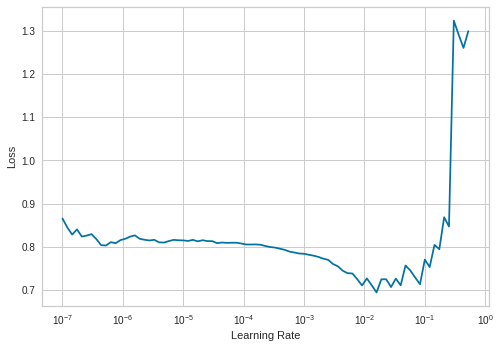

In [199]:
learn.lr_find()

In [200]:
learn.fine_tune(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,time
0,0.465865,0.776532,0.830508,0.497449,0.000000,0.000000,00:04


epoch,train_loss,valid_loss,accuracy,roc_auc_score,precision_score,recall_score,time
0,0.323373,0.628975,0.830508,0.497449,0.000000,0.000000,00:04
1,0.212172,0.593734,0.830508,0.502551,0.000000,0.000000,00:04
2,0.205524,0.914700,0.830508,0.497449,0.000000,0.000000,00:04
3,0.190716,0.780756,0.830508,0.502551,0.000000,0.000000,00:04
4,0.167379,0.955354,0.830508,0.502551,0.000000,0.000000,00:04
5,0.095870,0.966577,0.830508,0.502551,0.000000,0.000000,00:04
6,0.040892,1.393632,0.830508,0.502551,0.000000,0.000000,00:04
7,0.021438,1.204639,0.830508,0.502551,0.000000,0.000000,00:04
8,0.017399,1.349500,0.830508,0.502551,0.000000,0.000000,00:04
9,0.004320,1.310108,0.830508,0.502551,0.000000,0.000000,00:04
